In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [30]:
df = pd.read_csv('train.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [31]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [32]:
df.shape , len(df.artists.unique())

((114000, 20), 31438)

In [33]:
df.dropna(inplace=True)

In [34]:
df  = df.drop_duplicates(subset='track_id', keep='first')

In [35]:
df.shape , len(df.artists.unique())

((89740, 20), 31437)

# Dia 01

### Transformar variáveis booleanas em “Yes” e “No”

In [36]:
df['explicit'] = df['explicit'].replace({True: 'Yes', False: 'No'})

### Transformar as escalas das variáveis de 0 a 1 para 0 a 100

In [37]:
data = [
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence'
]

In [38]:
# só multiplicar por 100
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(df[data])
df[data] = scaler.transform(df[data])

### Transformar a variável track_genre em que a primeira letra fique maiúscula

In [39]:
df.track_genre = df.track_genre.str.capitalize()

### Criar a coluna album_extra extraindo os caracteres dentro do parênteses da variável album_name

In [40]:
df[['album_name', 'album_extra']] = df['album_name'].str.split('(', n=1, expand=True)
df['album_extra'] = df['album_extra'].str.split(')', n=0, expand=True)[0]

### Criar a coluna duration_s transformando a variável duration_ms para segundos

In [41]:
df['duration_s'] = df.duration_ms / 1000

### Criar a coluna duration_m transformando a variável duration_ms para minutos

In [42]:
df['duration_m'] = df.duration_ms / 60000

### Criar a coluna number_of_artists com o número de artistas em cada música

In [43]:
df['number_of_artists'] = (df['artists'].str.count(';') + 1).astype(int)

### Criar a coluna is_remix a partir da identificação da palavra Remix no nome da música

In [44]:
df['is_remix'] = df['track_name'].str.count('remix')

In [45]:
df['is_remix'] = df['is_remix'].replace({
    0: 'No',
    1: 'Yes'
})

### Criar a coluna is_remastered a partir da identificação da palavra Remastered no nome da música

In [46]:
df['is_remastered'] = df['track_name'].str.count('remastered')

In [47]:
df['is_remastered'] = df['is_remastered'].replace({
    0: 'No',
    1: 'Yes'
})

### salvar nova base

In [48]:
df.to_csv('spotify.csv', index=False)

# Dia 2

In [134]:
df = pd.read_csv('spotify.csv')

In [116]:
df[df.popularity == 100]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,album_extra,duration_s,duration_m,number_of_artists,is_remix,is_remastered
18906,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy,Unholy (feat. Kim Petras),100,156943,No,72.48731,47.2,2,...,23.919598,131.121,4,Dance,feat. Kim Petras,156.943,2.615717,2,No,No


### Identificar os artistas mais populares

(aqui alguns artistas possuem apenas uma música)

In [117]:
df.groupby('artists').popularity.count().sort_values()

artists
Szumek;Majki                                                                      1
KAAZE;MARF                                                                        1
K1                                                                                1
K/DA;Madison Beer;Kim Petras;League of Legends                                    1
K/DA;Madison Beer;(G)I-DLE;Lexie Liu;Jaira Burns;Seraphine;League of Legends      1
                                                                               ... 
Håkan Hellström                                                                 141
BTS                                                                             143
The Beatles                                                                     149
my little airport                                                               171
George Jones                                                                    260
Name: popularity, Length: 31437, dtype: int64

In [118]:
df_populares = df.groupby('artists').popularity.mean().sort_values(ascending=False).head(10).reset_index()
df_populares

,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,95.0
5,Joji,94.0
6,Beyoncé,93.0
7,Harry Styles,92.0
8,Rema;Selena Gomez,92.0
9,Drake;21 Savage,91.0


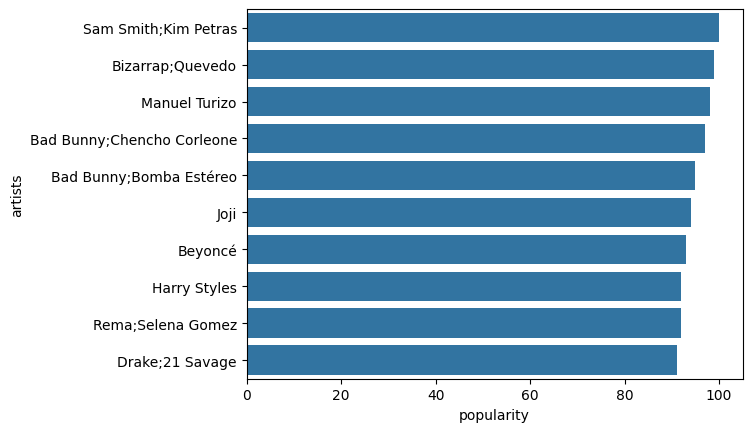

In [119]:
sns.barplot(data=df_populares, x='popularity', y='artists');

(artistas com mais de uma música)

In [120]:
df_varias_musicas = df.groupby('artists').filter(lambda x: x['track_name'].count() > 1).copy()
# df_varias_musicas

In [121]:
df_populares = df_varias_musicas.groupby('artists').popularity.mean().sort_values(ascending=False).head(10).reset_index()

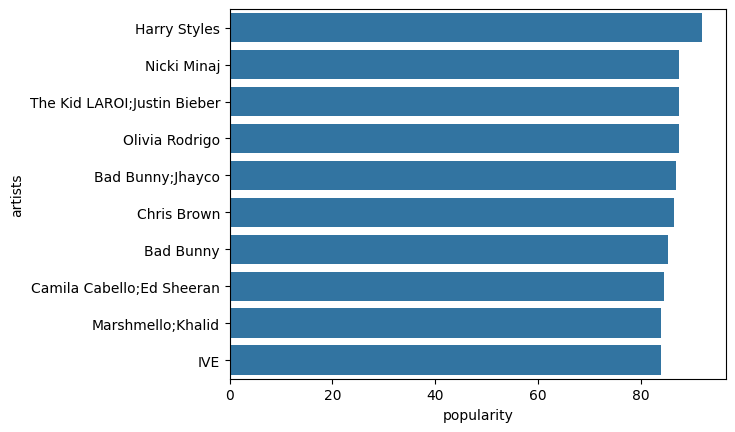

In [122]:
sns.barplot(data=df_populares, y='artists', x='popularity');

In [123]:
df_populares

,artists,popularity
0,Harry Styles,92.000000
1,Nicki Minaj,87.500000
2,The Kid LAROI;Justin Bieber,87.500000
3,Olivia Rodrigo,87.400000
4,Bad Bunny;Jhayco,87.000000
5,Chris Brown,86.500000
6,Bad Bunny,85.363636
7,Camila Cabello;Ed Sheeran,84.500000
8,Marshmello;Khalid,84.000000
9,IVE,84.000000


### Analisar a distribuição de número de artistas por música

artistas podem ter músicas com o mesmo nome mas com letras e melodias diferentes
        ex: Alone

(musicas duplicadas)

In [124]:
df.groupby('track_name').artists.count().sort_values(ascending=False).head(10).reset_index()

,track_name,artists
0,Rockin' Around The Christmas Tree,48
1,Frosty The Snowman,45
2,Little Saint Nick - 1991 Remix,41
3,Run Rudolph Run,40
4,Let It Snow! Let It Snow! Let It Snow!,38
5,Santa Claus Is Coming To Town,38
6,Winter Wonderland,37
7,Have Yourself A Merry Little Christmas,36
8,Rudolph The Red-Nosed Reindeer,35
9,I Saw Mommy Kissing Santa Claus,33


In [125]:
# uma música do mesmo artista pode estar em muitas playlists diferentes
df[df['track_name'] == 'Frosty The Snowman']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,album_extra,duration_s,duration_m,number_of_artists,is_remix,is_remastered
7413,72E3wMPI5tVY7VoEWLSuhf,Ella Fitzgerald,CHRISTMAS TOP HITS 2022,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7414,7vvQrcQCfq7SB8mxO9CRHq,Ella Fitzgerald,Rockin' Around The Christmas Tree 2022,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7423,6UPkgLF8SfiVmVGy5RYvIc,Ella Fitzgerald,World's Best Christmas Playlist,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7425,1LFJLpGF7gexCurvUsjqG9,Ella Fitzgerald,Santa Claus Is Coming To Town,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7438,0edRP0RpOUrjHbbGPSYzaH,Ella Fitzgerald,Christmas Songs 2022,Frosty The Snowman,4,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7440,7zrxUrilLtTk4XnT5G7zF8,Ella Fitzgerald,All I Want For Christmas Is You,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7441,0ctlOXCRfpjRUkBcQxs3nu,Ella Fitzgerald,Christmas Classics,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7443,1lJWopyBsnNY029HUETv0R,Ella Fitzgerald,Rock Christmas 2022 - The Very Best Of,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7444,4UGYAzxUtzLllltVU4gaS8,Ella Fitzgerald,Holidays Are Coming,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
7448,7i0UYyimBRONNLjNdsfVBz,Ella Fitzgerald,Christmas Best Hits 2022,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No


(musicas não duplicadas)

In [126]:
df_artistas_musica = df[['track_name', 'artists']].drop_duplicates(keep='first')

In [131]:
df_artistas_musica.shape

(81343, 2)

In [127]:
df_artistas_musica[df_artistas_musica['track_name'] == 'Frosty The Snowman']

,track_name,artists
7413,Frosty The Snowman,Ella Fitzgerald
55937,Frosty The Snowman,Cooltime Kids
81050,Frosty The Snowman,The Jackson 5


In [128]:
df_artistas_musica.groupby('track_name').artists.count().sort_values(ascending=False).head(10).reset_index()

,track_name,artists
0,Home,24
1,Paradise,22
2,Alone,21
3,Without You,18
4,Intro,18
5,Heaven,17
6,Stay,16
7,You,16
8,Hold On,16
9,Monster,16


In [129]:
df_artistas_musica[df_artistas_musica['track_name'] == 'Home']

,track_name,artists
524,Home,Gabrielle Aplin
4325,Home,Dustin O'Halloran
12837,Home,Robert Hood
14817,Home,Tenno
18116,Home,Blake Shelton
18121,Home,Blake Shelton;Michael Bublé
20036,Home,Yemi Alade
25449,Home,Andy Tallent
29331,Home,Solomun
30334,Home,RE:UNION


### Analisar a relação entre as variáveis energy e loudness 

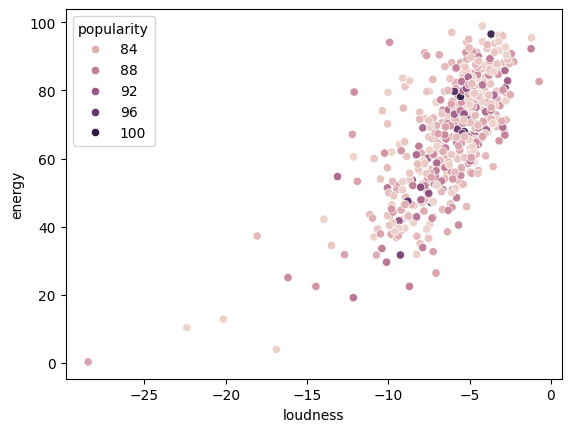

In [68]:
sns.scatterplot(data=df[df['popularity'] > 80], x='loudness', y='energy', hue='popularity');

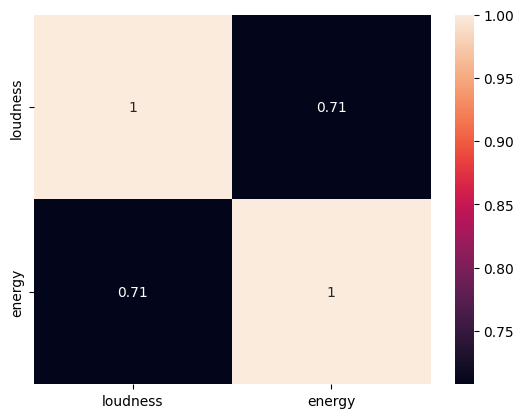

In [70]:
sns.heatmap(df[df['popularity'] > 80][['loudness', 'energy']].corr(method='pearson', numeric_only=True), annot=True);

### Analisar a relação entre as variáveis time_signature e track_genre

In [86]:
maiores_generos = df.groupby('track_genre').track_name.count().sort_values(ascending=False).head(10).reset_index()['track_genre'].to_list()

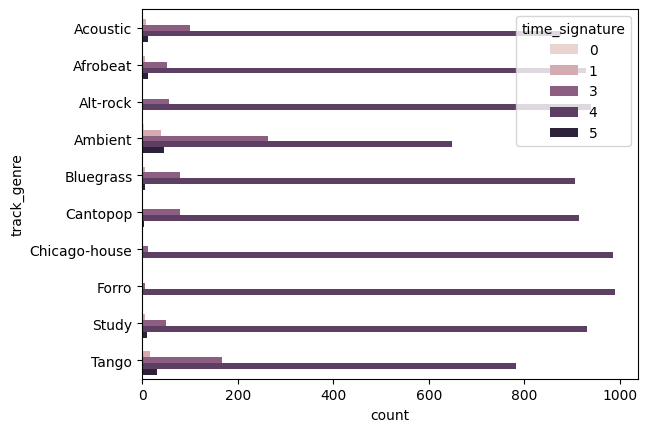

In [93]:

sns.countplot(data=df[df['track_genre'].isin(maiores_generos)] , y='track_genre', hue='time_signature');

In [95]:
df.groupby(['time_signature', 'track_genre']).track_genre.count()

time_signature  track_genre
0               Alt-rock        1
                Ambient         3
                Disney          1
                Guitar          4
                Iranian         4
                               ..
5               Techno          1
                Trance          4
                Trip-hop        4
                Turkish         9
                World-music    13
Name: track_genre, Length: 446, dtype: int64

In [96]:
df['time_signature'].value_counts()

time_signature
4    79543
3     7604
5     1585
1      846
0      162
Name: count, dtype: int64

### Criar uma versão agrupada do dataset por track_genre

In [97]:
df_agrupado = df.groupby(['track_genre', 'duration_m']).popularity.mean().reset_index()
df_agrupado

,track_genre,duration_m,popularity
0,Acoustic,0.997050,41.0
1,Acoustic,1.005100,51.0
2,Acoustic,1.006883,51.0
3,Acoustic,1.129100,53.0
4,Acoustic,1.168883,53.0
...,...,...,...
80938,World-music,10.196167,43.0
80939,World-music,11.754800,25.0
80940,World-music,12.964433,41.0
80941,World-music,24.299967,29.0


In [98]:
df_agrupado.to_csv('versao_agrupada.csv', index=False)

### Analisar a relação entre a duração (em minutos) e a popularidade da música

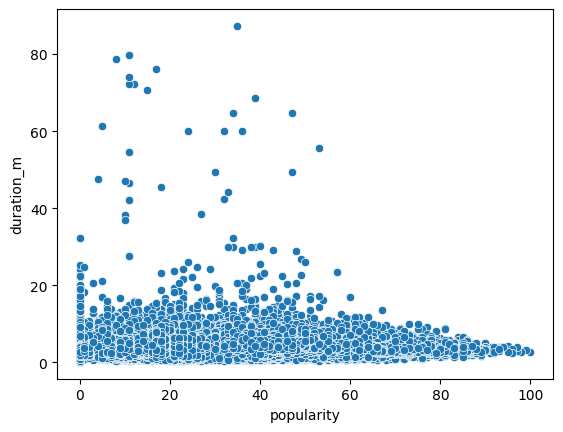

In [135]:
sns.scatterplot(data=df, y='duration_m', x='popularity');

In [136]:
# as musicas mais populares possuem uma duração entre 3 e 4 minutos
round(df[df['popularity'] > 80].duration_m).value_counts()

duration_m
3.0    238
4.0    177
2.0     39
5.0     36
6.0      6
7.0      2
9.0      2
Name: count, dtype: int64

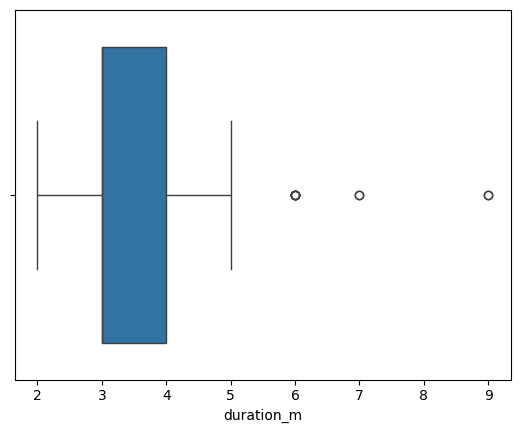

In [103]:
sns.boxplot(x=pd.DataFrame(round(df[df['popularity'] > 80].duration_m))['duration_m']);

In [138]:
bins = [0, 20, 40, 60, 80, 100]
labels = [20, 40, 60, 80, 100]

df['bins_popularity'] = pd.cut(df['popularity'], bins=bins, labels=labels)

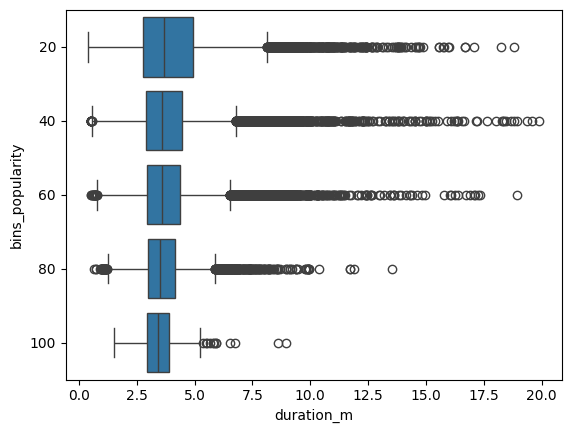

In [144]:
sns.boxplot(data=df[df['duration_m'] < 20], x='duration_m', y='bins_popularity');

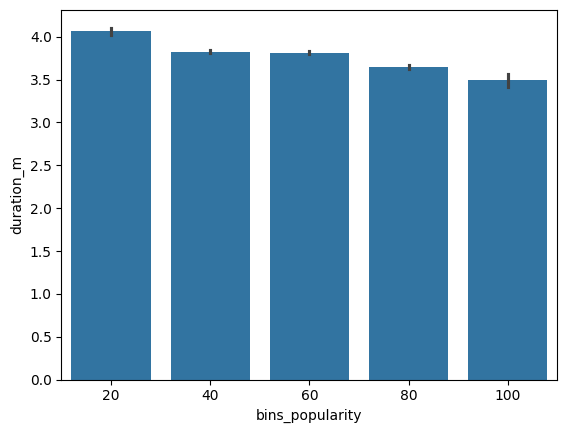

In [139]:
sns.barplot(data=df, y='duration_m', x='bins_popularity');

In [106]:
df[['duration_m', 'popularity']].corr()

,duration_m,popularity
duration_m,1.000000,-0.023157
popularity,-0.023157,1.000000


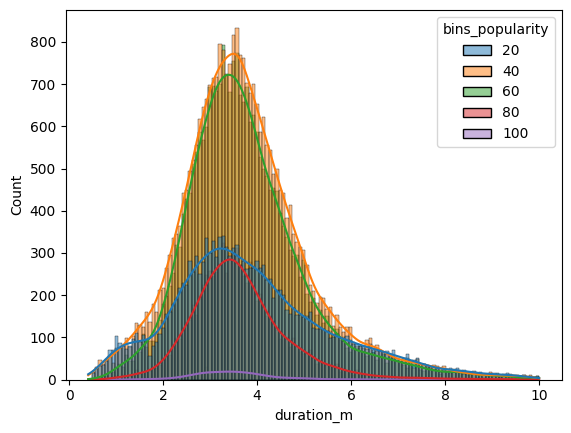

In [107]:
sns.histplot(data=df[df.duration_m < 10], 
             x='duration_m', 
             hue='bins_popularity', 
             kde=True);

### Analisar quais as diferenças entre uma música remixada e não remixada

In [108]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'album_extra',
       'duration_s', 'duration_m', 'number_of_artists', 'is_remix',
       'is_remastered', 'bins_popularity'],
      dtype='object')

In [109]:
df.groupby('is_remix')[['popularity', 'duration_m', 'instrumentalness', 'valence']].mean().reset_index()

,is_remix,popularity,duration_m,instrumentalness,valence
0,No,33.203558,3.819081,17.334881,47.187025
1,Yes,16.807692,3.789171,40.307074,34.538075


### Analisar quais as diferenças entre uma música remasterizada e não remasterizada 

In [110]:
df.groupby('is_remastered')[['popularity','duration_m', 'instrumentalness', 'valence']].mean().reset_index()

,is_remastered,popularity,duration_m,instrumentalness,valence
0,No,33.199521,3.819047,17.339849,47.185165
1,Yes,20.400000,4.284750,47.640031,14.804020
